**Data Background**

Ford GoBike is a regional public bike sharing system in the San Francisco Bay Area, California. The dataset used for this exploratory analysis consists of monthly individual trip data from February, 2019 in CSV format covering the greater San Francisco Bay area.

**Loading Libraries**

In [1]:
#Import Numpy
import numpy as np

#Import Pandas
import pandas as pd

#Import Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Import Seaborn
import seaborn as sns
sns.set_theme()

#Import Warning for ignoring unneccessary warnings
import warnings
warnings.filterwarnings("ignore")

**Data Gathering**

In [2]:
data = pd.read_csv('201902-fordgobike-tripdata.csv')
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
data.sample(50)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
32561,929,2019-02-24 13:58:38.7070,2019-02-24 14:14:07.9050,372.0,Madison St at 17th St,37.804037,-122.262409,196.0,Grand Ave at Perkins St,37.808894,-122.256460,6354,Subscriber,1984.0,Male,No
33579,175,2019-02-24 11:22:33.4330,2019-02-24 11:25:28.8580,195.0,Bay Pl at Vernon St,37.812314,-122.260779,180.0,Telegraph Ave at 23rd St,37.812678,-122.268773,6451,Subscriber,1992.0,Male,No
36156,457,2019-02-23 16:52:29.0310,2019-02-23 17:00:06.7200,223.0,16th St Mission BART Station 2,37.764765,-122.420091,85.0,Church St at Duboce Ave,37.770083,-122.429156,5150,Subscriber,1989.0,Male,No
87326,581,2019-02-17 09:36:15.8760,2019-02-17 09:45:57.0030,214.0,Market St at Brockhurst St,37.823321,-122.275733,153.0,59th St at Horton St,37.840945,-122.291360,5212,Subscriber,1992.0,Other,No
4903,268,2019-02-28 14:40:53.1320,2019-02-28 14:45:21.7370,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,89.0,Division St at Potrero Ave,37.769218,-122.407646,5558,Subscriber,1982.0,Male,No
106745,431,2019-02-13 17:37:15.8930,2019-02-13 17:44:27.5930,113.0,Franklin Square,37.764555,-122.410345,133.0,Valencia St at 22nd St,37.755213,-122.420975,6389,Subscriber,1983.0,Male,No
141934,170,2019-02-07 17:39:22.7990,2019-02-07 17:42:13.4020,192.0,37th St at West St,37.826696,-122.271797,176.0,MacArthur BART Station,37.828410,-122.266315,2683,Subscriber,1994.0,Male,Yes
5454,371,2019-02-28 13:04:58.1970,2019-02-28 13:11:09.6130,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,10.0,Washington St at Kearny St,37.795393,-122.404770,4757,Subscriber,1991.0,Male,No
66822,400,2019-02-20 08:29:12.1020,2019-02-20 08:35:52.7480,142.0,Guerrero Park,37.745739,-122.422140,386.0,24th St at Bartlett St,37.752105,-122.419724,5000,Subscriber,1970.0,Female,No
163106,630,2019-02-05 09:35:38.4700,2019-02-05 09:46:09.2050,78.0,Folsom St at 9th St,37.773717,-122.411647,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,4928,Subscriber,1990.0,Male,No


**Assessing Data**

In [4]:
data.shape

(183412, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
# checking the percentage of missing values

def missing_values_tables(df):
    # Total Missing Values
    missing_values = df.isnull().sum()
    
    # Percentage of Missing Values
    missing_value_percent = 100 * (df.isnull().sum()/len(df))
    
    # Make a table with the results
    missing_value_table = pd.concat([missing_values, missing_value_percent], axis = 1)
    
    # Rename the columns 
    missing_values_table_rename_columns = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
                        
    # Sort the table by percentage of missing descending
    missing_values_table_rename_columns = missing_values_table_rename_columns[missing_values_table_rename_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    
    # Printing some sumarry information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(missing_values_table_rename_columns.shape[0]) +
              " columns that have missing values.")
                                   
     # Return the dataframe with missing information
    return missing_values_table_rename_columns

In [7]:
missing_values_tables(data)

Your selected dataframe has 16 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
member_birth_year,8265,4.5
member_gender,8265,4.5
start_station_id,197,0.1
start_station_name,197,0.1
end_station_id,197,0.1
end_station_name,197,0.1


In [8]:
data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [9]:
data.duplicated().sum()

0

In [10]:
data['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [11]:
data['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [12]:
data['bike_share_for_all_trip'].value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

**Data Cleaning**

-  Convert `start_time` and `end_time` to datetime format
-  Convert `start_station_id`, `end_station_id` and `bike_id` to "string" dtype 
-  Covert `user_type` and `member_gender` to "category" dtype 
-  Creation of new columns for `duration_minutes`, `trip start date` in yyyy-mm-dd format, `trip start hour` of the day, `day of week` and `month`

- Dropping rows with null values
-  Creation of new column calculating `age_of_rider` from `member_birth_year`
-  Convert `member_birth_year` and `age_of_rider` to integer instead of float type for visualization purposes

In [14]:
# Make a copy of the dataset

data_copy = data.copy()

**Define**
-  Convert `start_time` and `end_time` to datetime format

**Code**

In [15]:
data_copy['start_time'] = pd.to_datetime(data_copy['start_time'])
data_copy['end_time'] = pd.to_datetime(data_copy['end_time'])

**Test**

In [16]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

**Define**

-  Convert `start_station_id`, `end_station_id` and `bike_id` to "string" dtype 

**Code**

In [17]:
data_copy['start_station_id'] = data_copy['start_station_id'].astype('str')
data_copy['end_station_id'] = data_copy['end_station_id'].astype('str')
data_copy['bike_id'] = data_copy['bike_id'].astype('str')

**Test**

In [18]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

**Define**

-  Covert `user_type` and `member_gender` to "category" dtype 

**Code**

In [19]:
data_copy['user_type'] = data_copy['user_type'].astype('category')
data_copy['member_gender'] = data_copy['member_gender'].astype('category')

**Test**

In [20]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

**Define**

-  Creation of new columns for `duration_minutes`, `trip start date` in yyyy-mm-dd format, `trip start hour` of the day, `day of week` and `month`

**Code**

In [21]:
# Converting seconds to minutes by dividing by 60
data_copy['duration_minutes'] = data_copy['duration_sec']/60

# creating new columns for trip start date in yyyy-mm-dd format, trip start hour of the day, day of week and month

data_copy['trip_start_date'] = data_copy['start_time'].dt.strftime('%Y-%m-%d')
data_copy['trip_start_hour_of_day'] = data_copy['start_time'].dt.strftime('%H')
data_copy['trip_start_day_of_week'] = data_copy['start_time'].dt.strftime('%A')
data_copy['trip_start_month'] = data_copy['start_time'].dt.strftime('%B')

**Test**

In [22]:
data_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minutes,trip_start_date,trip_start_hour_of_day,trip_start_day_of_week,trip_start_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,869.750000,2019-02-28,17,Thursday,February
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,NaN,NaN,No,708.683333,2019-02-28,18,Thursday,February
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,1030.900000,2019-02-28,12,Thursday,February
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,608.166667,2019-02-28,17,Thursday,February
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,26.416667,2019-02-28,23,Thursday,February


**Define**

Creation of new column calculating `age_of_rider` from `member_birth_year` and convert to integer for visualization purposes

**Code**

In [23]:
data_copy['age_of_rider'] = 2022 - data_copy['member_birth_year']

**Test**

In [24]:
data_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minutes,trip_start_date,trip_start_hour_of_day,trip_start_day_of_week,trip_start_month,age_of_rider
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,869.750000,2019-02-28,17,Thursday,February,38.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,Customer,NaN,NaN,No,708.683333,2019-02-28,18,Thursday,February,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,1030.900000,2019-02-28,12,Thursday,February,50.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,608.166667,2019-02-28,17,Thursday,February,33.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,26.416667,2019-02-28,23,Thursday,February,48.0


**Define**

- Dropping rows with null values

**Code**

In [25]:
data_copy.dropna(inplace=True)

**Test**

In [26]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

**Define**

-  Convert `member_birth_year` and `age_of_rider` to integer instead of float type for visualization purposes

**Code**

In [27]:
data_copy['member_birth_year'] = data_copy['member_birth_year'].astype('int')
data_copy['age_of_rider'] = data_copy['age_of_rider'].astype('int')

**Test**

In [28]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

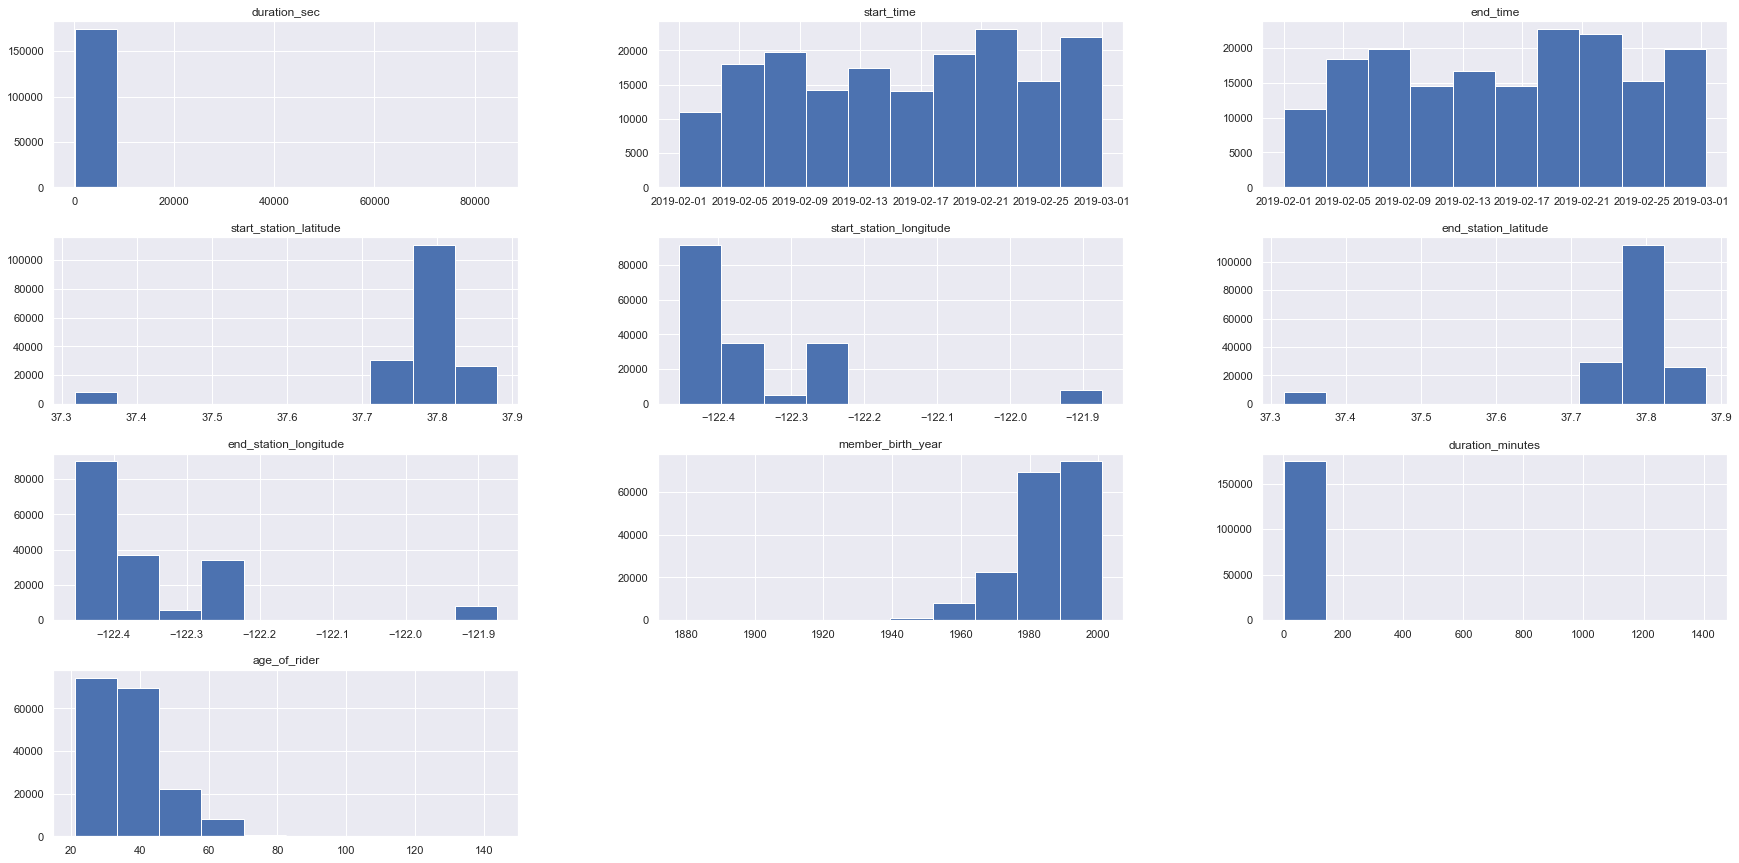

In [29]:
data_copy.hist(figsize=(30,15))
plt.show()

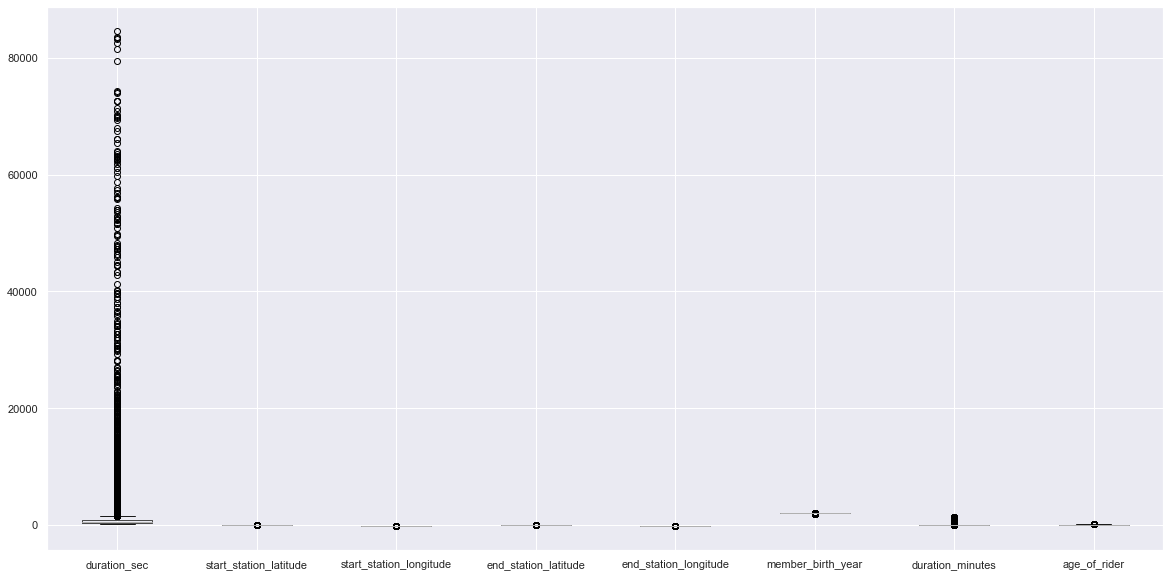

In [30]:
data_copy.boxplot(figsize=(20,10))
plt.show()

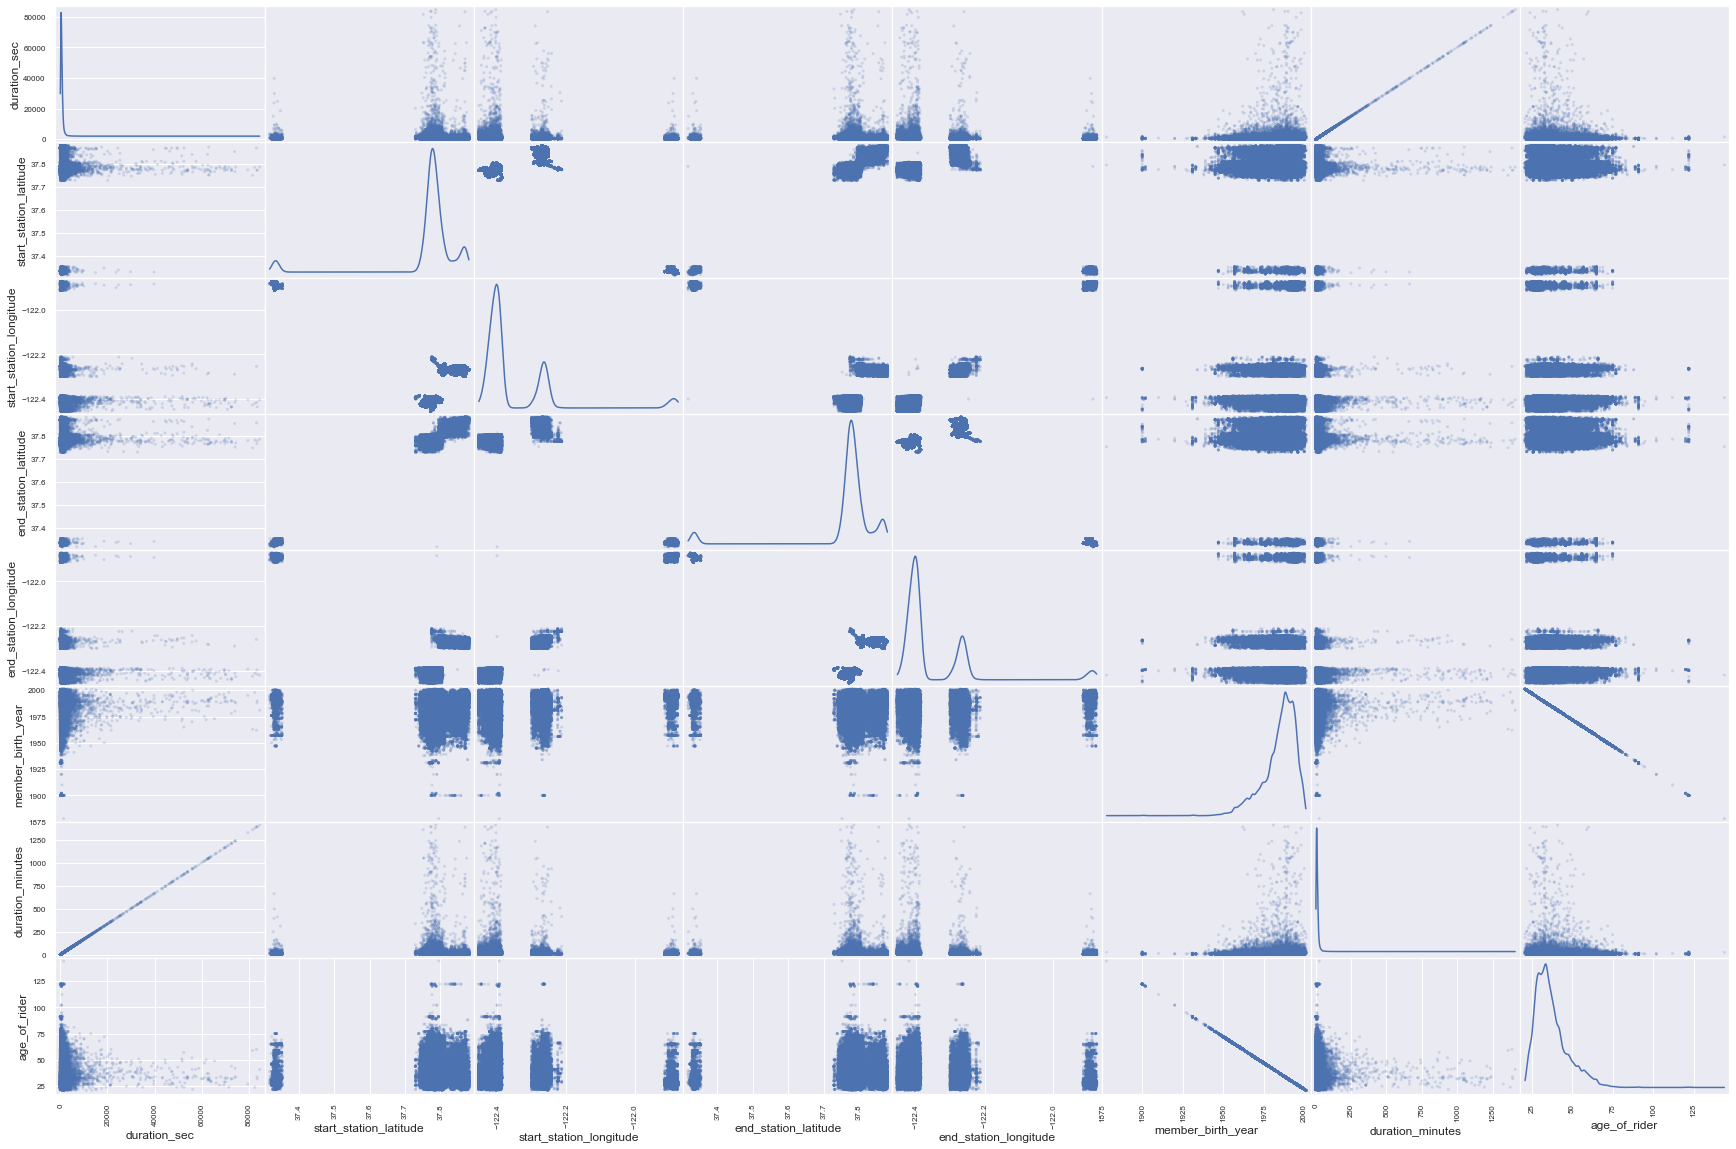

In [31]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_copy, alpha=0.2, figsize=(30, 20), diagonal='kde')
plt.show()

In [32]:
data_copy['trip_start_month'].value_counts()

February    174952
Name: trip_start_month, dtype: int64

In [33]:
data_copy.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'duration_minutes', 'trip_start_date', 'trip_start_hour_of_day',
       'trip_start_day_of_week', 'trip_start_month', 'age_of_rider'],
      dtype='object')

#### What is the structure of your dataset?

The original contains approximately 183,412 individual trip records with 16 variables collected. The variables can be divided into 3 major categories:

- Ride information: `bike_id`, `user_type`, `member_birth_year`, `member_gender`, `bike_share_for_all_trip`
- Trip Timing: `duration_sec`, `start_time`, `end_time`
- Station information: `start_station_id`, `start_station_name`, `start_station_latitude`, `start_station_longitude`, `end_station_id`, `end_station_name`, `end_station_latitude`, `end_station_longitude`

#### Derived variable for visualization

- Other Trip Timing information: `duration_minute`, `trip_start_date`, `trip_start_hour_of_day`, `trip_start_day_of_week`, `trip_start_month`
- Rider: `age_of_rider`

#### What is/are the main feature(s) of interest in your dataset?

I'm mainly interested in examining the bike trips' duration and rental event occurrence patterns, as well as how these relate to the riders' attributes, i.e. their user type, gender, age, etc., in order to determine how and why individuals are utilising the bike sharing service. Sample questions to answer: When are the majority of journeys taken in terms of time of day, weekday, and month? How long does the typical journey last? Depends on if the user is a subscriber or a customer?

#### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The information on each journey's start date/time and duration will help you determine how long a typical trip takes and when it begins. The member information such as user type, gender, and age will help determine who the primary target customer groups are; I will then use the different groups to summarise bike usage data to determine if there are any unique patterns connected with a particular set of riders.

In [34]:
data_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minutes,trip_start_date,trip_start_hour_of_day,trip_start_day_of_week,trip_start_month,age_of_rider
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984,Male,No,869.750000,2019-02-28,17,Thursday,February,38
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972,Male,No,1030.900000,2019-02-28,12,Thursday,February,50
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989,Other,No,608.166667,2019-02-28,17,Thursday,February,33
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,Yes,26.416667,2019-02-28,23,Thursday,February,48
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959,Male,No,29.883333,2019-02-28,23,Thursday,February,63


### Univariate Exploration

- Exploring User Type, Gender and Bike Share for all Trip
- Exploring trip start day of the week, trip Start Hour of Day, trip duration minutes, and age of rider

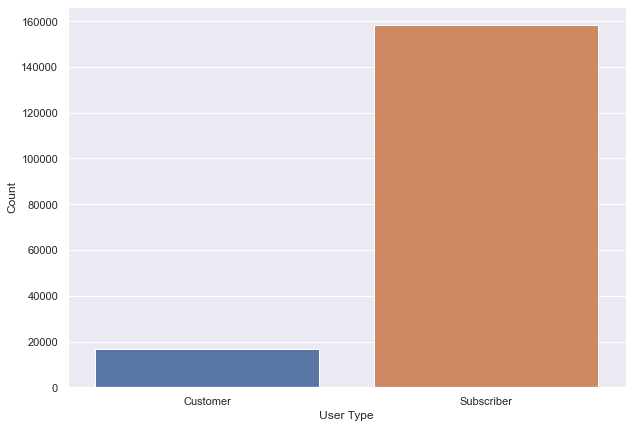

In [35]:
plt.rcParams['figure.figsize'] = 10, 7
sns.countplot(data=data_copy, x='user_type');
plt.xlabel('User Type');
plt.ylabel('Count');

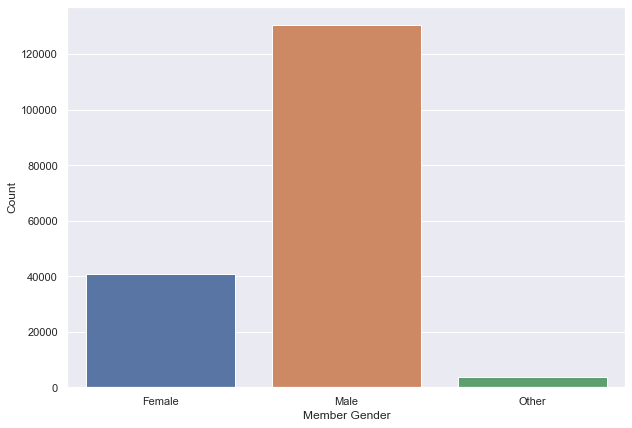

In [36]:
sns.countplot(data=data_copy, x='member_gender');
plt.xlabel('Member Gender');
plt.ylabel('Count');

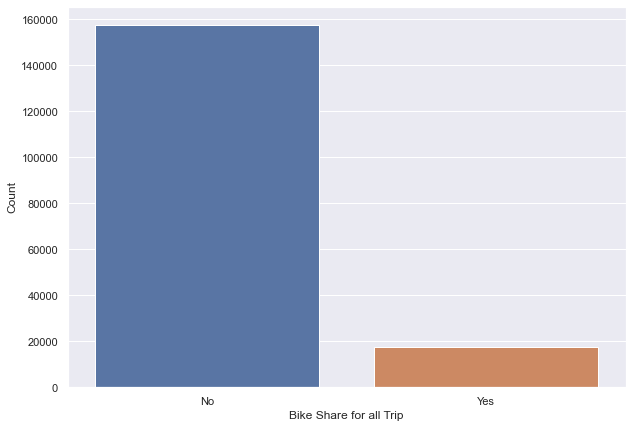

In [37]:
sns.countplot(data=data_copy, x='bike_share_for_all_trip');
plt.xlabel('Bike Share for all Trip');
plt.ylabel('Count');

**Inferences**

Majority of the users were male and subscriber compared to the female and customer respectively and also majority didn't share their ride for their trips.

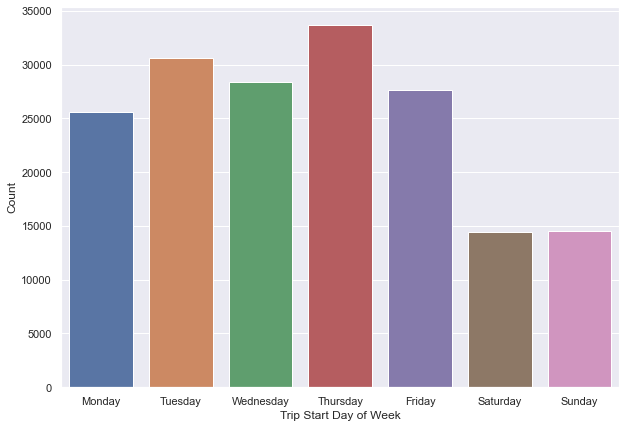

In [38]:
days_of_the_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_of_the_week_categorization = pd.api.types.CategoricalDtype(ordered=True, categories=days_of_the_week)
data_copy['trip_start_day_of_week'] = data_copy['trip_start_day_of_week'].astype(days_of_the_week_categorization)

sns.countplot(data=data_copy, x='trip_start_day_of_week');
plt.xlabel('Trip Start Day of Week');
plt.ylabel('Count');

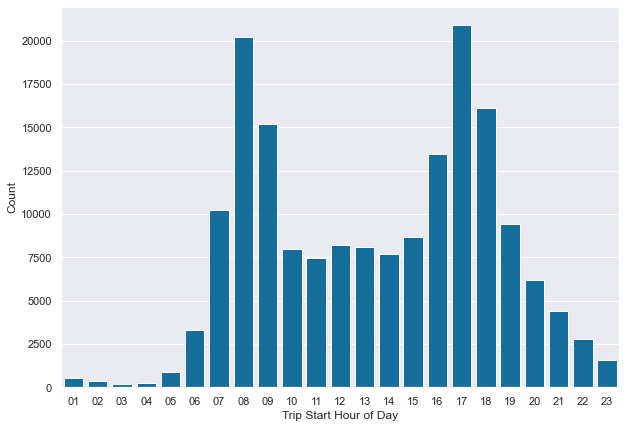

In [39]:
hour_of_day = ['01', '02', '03','04', '05', '06','07', '08', '09', '10', '11', '12','13', '14', '15','16', '17', '18', '19','20', '21', '22','23']
hour_of_day_categorization = pd.api.types.CategoricalDtype(ordered=True, categories=hour_of_day)
data_copy['trip_start_hour_of_day'] = data_copy['trip_start_hour_of_day'].astype(hour_of_day_categorization)

base_color = sns.color_palette('colorblind')[0]
sns.countplot(data=data_copy, x='trip_start_hour_of_day', color = base_color);
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Count');

**Inferences**

The distribution of daytime trips peaks between 7am and 9am and 4pm and 7pm during normal rush hours. The bulk of rides occurred on work days (Monday through Friday) and the primary usage is likely for commuting. This is evident from the trip distribution over day of the week plot.

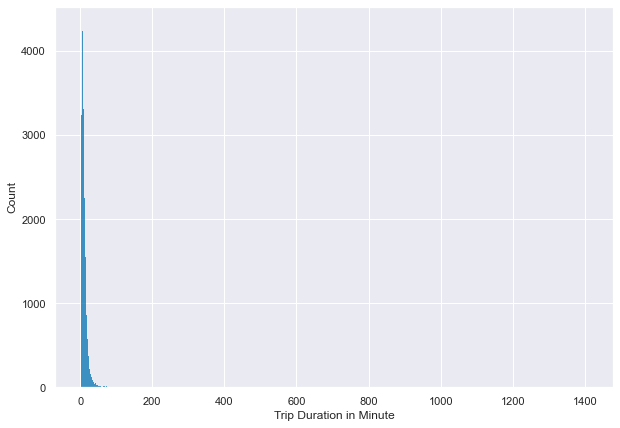

In [40]:
sns.histplot(data=data_copy, x='duration_minutes', color = base_color);
plt.xlabel('Trip Duration in Minute');
plt.ylabel('Count');

**Inferences**

It is worthy of note that majority of the rides were quite short (within 200 mins). Going to zoom in to the most cases for a closer picture of what the distribution is like by removing the outlier above 60mins

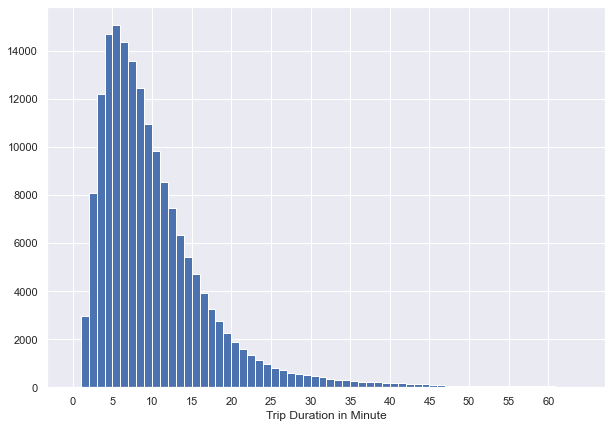

In [41]:
# Visualizing the outliers above 60mins

bins = np.arange(0, 65, 1)
ticks = np.arange(0, 65, 5)
plt.hist(data=data_copy, x='duration_minutes', bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute');

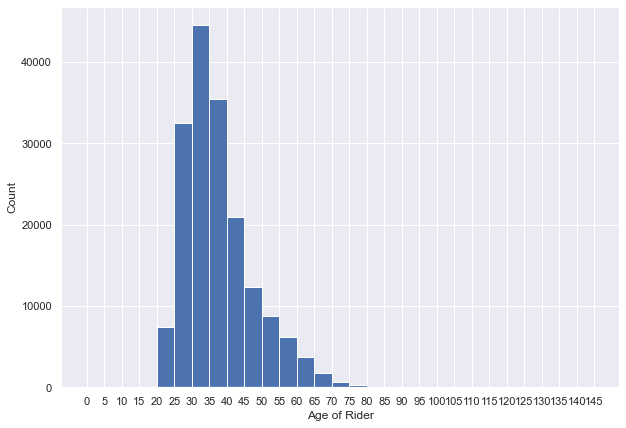

In [42]:
# Visualizing the age of the riders

bins = np.arange(0, data_copy['age_of_rider'].max()+5, 5)
plt.hist(data=data_copy, x='age_of_rider', bins=bins);
plt.xticks(bins, bins);
plt.xlabel('Age of Rider');
plt.ylabel('Count');

In [43]:
# Query the duration minutes within 60mins and age range within 80years
data_copy = data_copy.query('duration_minutes <= 66')
data_copy = data_copy.query('age_of_rider <= 80')
data_copy.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173524 entries, 4 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             173524 non-null  int64         
 1   start_time               173524 non-null  datetime64[ns]
 2   end_time                 173524 non-null  datetime64[ns]
 3   start_station_id         173524 non-null  object        
 4   start_station_name       173524 non-null  object        
 5   start_station_latitude   173524 non-null  float64       
 6   start_station_longitude  173524 non-null  float64       
 7   end_station_id           173524 non-null  object        
 8   end_station_name         173524 non-null  object        
 9   end_station_latitude     173524 non-null  float64       
 10  end_station_longitude    173524 non-null  float64       
 11  bike_id                  173524 non-null  object        
 12  user_type       

In [44]:
# save the clean data to a .csv file

data_copy.to_csv('fordgobike_trips_clean.csv', index=False)


#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distribution of daytime trips peaks between 7am and 9am and 4pm and 7pm during normal rush hours. The bulk of rides occurred on work days (Monday through Friday) and the primary usage is likely for commuting. This is evident from the trip distribution over day of the week plot.


There were more male than female users, and the majority of members were subscribers as opposed to occasional users. The majority of members did not utilise bike sharing for all of their journeys, and the majority were between the ages of 25 and 40.

The majority of trips were rapid and brief, lasting between 5 and 15 minutes, while there were exceptions as long as 24 hours.


#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When the original data were initially plotted, the distribution of trip duration was a little surprising. Utilized `xticks()` to hone in on a narrower region where the majority of travel data fell, hence making the distribution much more transparent. To aid in focusing on the most common cases of system use, I filtered out the long trip records and age group of the riders for the study using `.query()`

In [45]:
data_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minutes,trip_start_date,trip_start_hour_of_day,trip_start_day_of_week,trip_start_month,age_of_rider
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,Yes,26.416667,2019-02-28,23,Thursday,February,48
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959,Male,No,29.883333,2019-02-28,23,Thursday,February,63
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,Subscriber,1983,Female,No,19.116667,2019-02-28,23,Thursday,February,39
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Subscriber,1989,Male,No,26.916667,2019-02-28,23,Thursday,February,33
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Subscriber,1988,Other,No,26.166667,2019-02-28,23,Thursday,February,34


### Bivariate Exploration

- Duration in minutes with respect to user type (customers and subscribers)?
- Trip start date and average duration in minutes distribution which gives specific insight into days with high duration
- How does the trip duration distribution vary between customers and subscribers?
- Average trip duration on days of the week
- Average trip duration on member gender
- Distribution of Age of riders on the days of the week
- Weekly usage between customers and subscribers

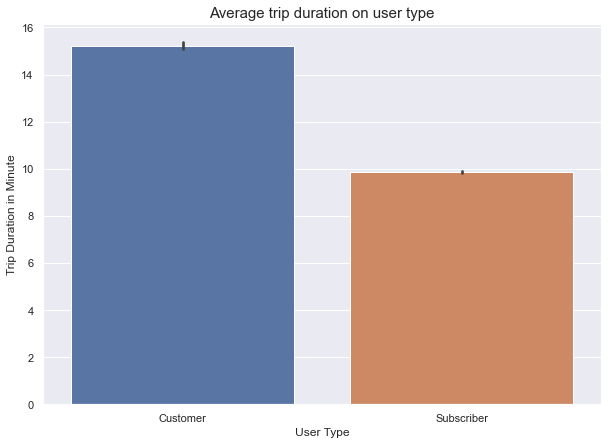

In [46]:
sns.barplot(data = data_copy, x='user_type',y='duration_minutes')
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');
plt.title('Average trip duration on user type', fontsize = 15)
plt.show()

**Inference**

Even though there is lesser number of customer compared to subscriber, the average duration in minutes spent by the customer is more than that of the subscriber

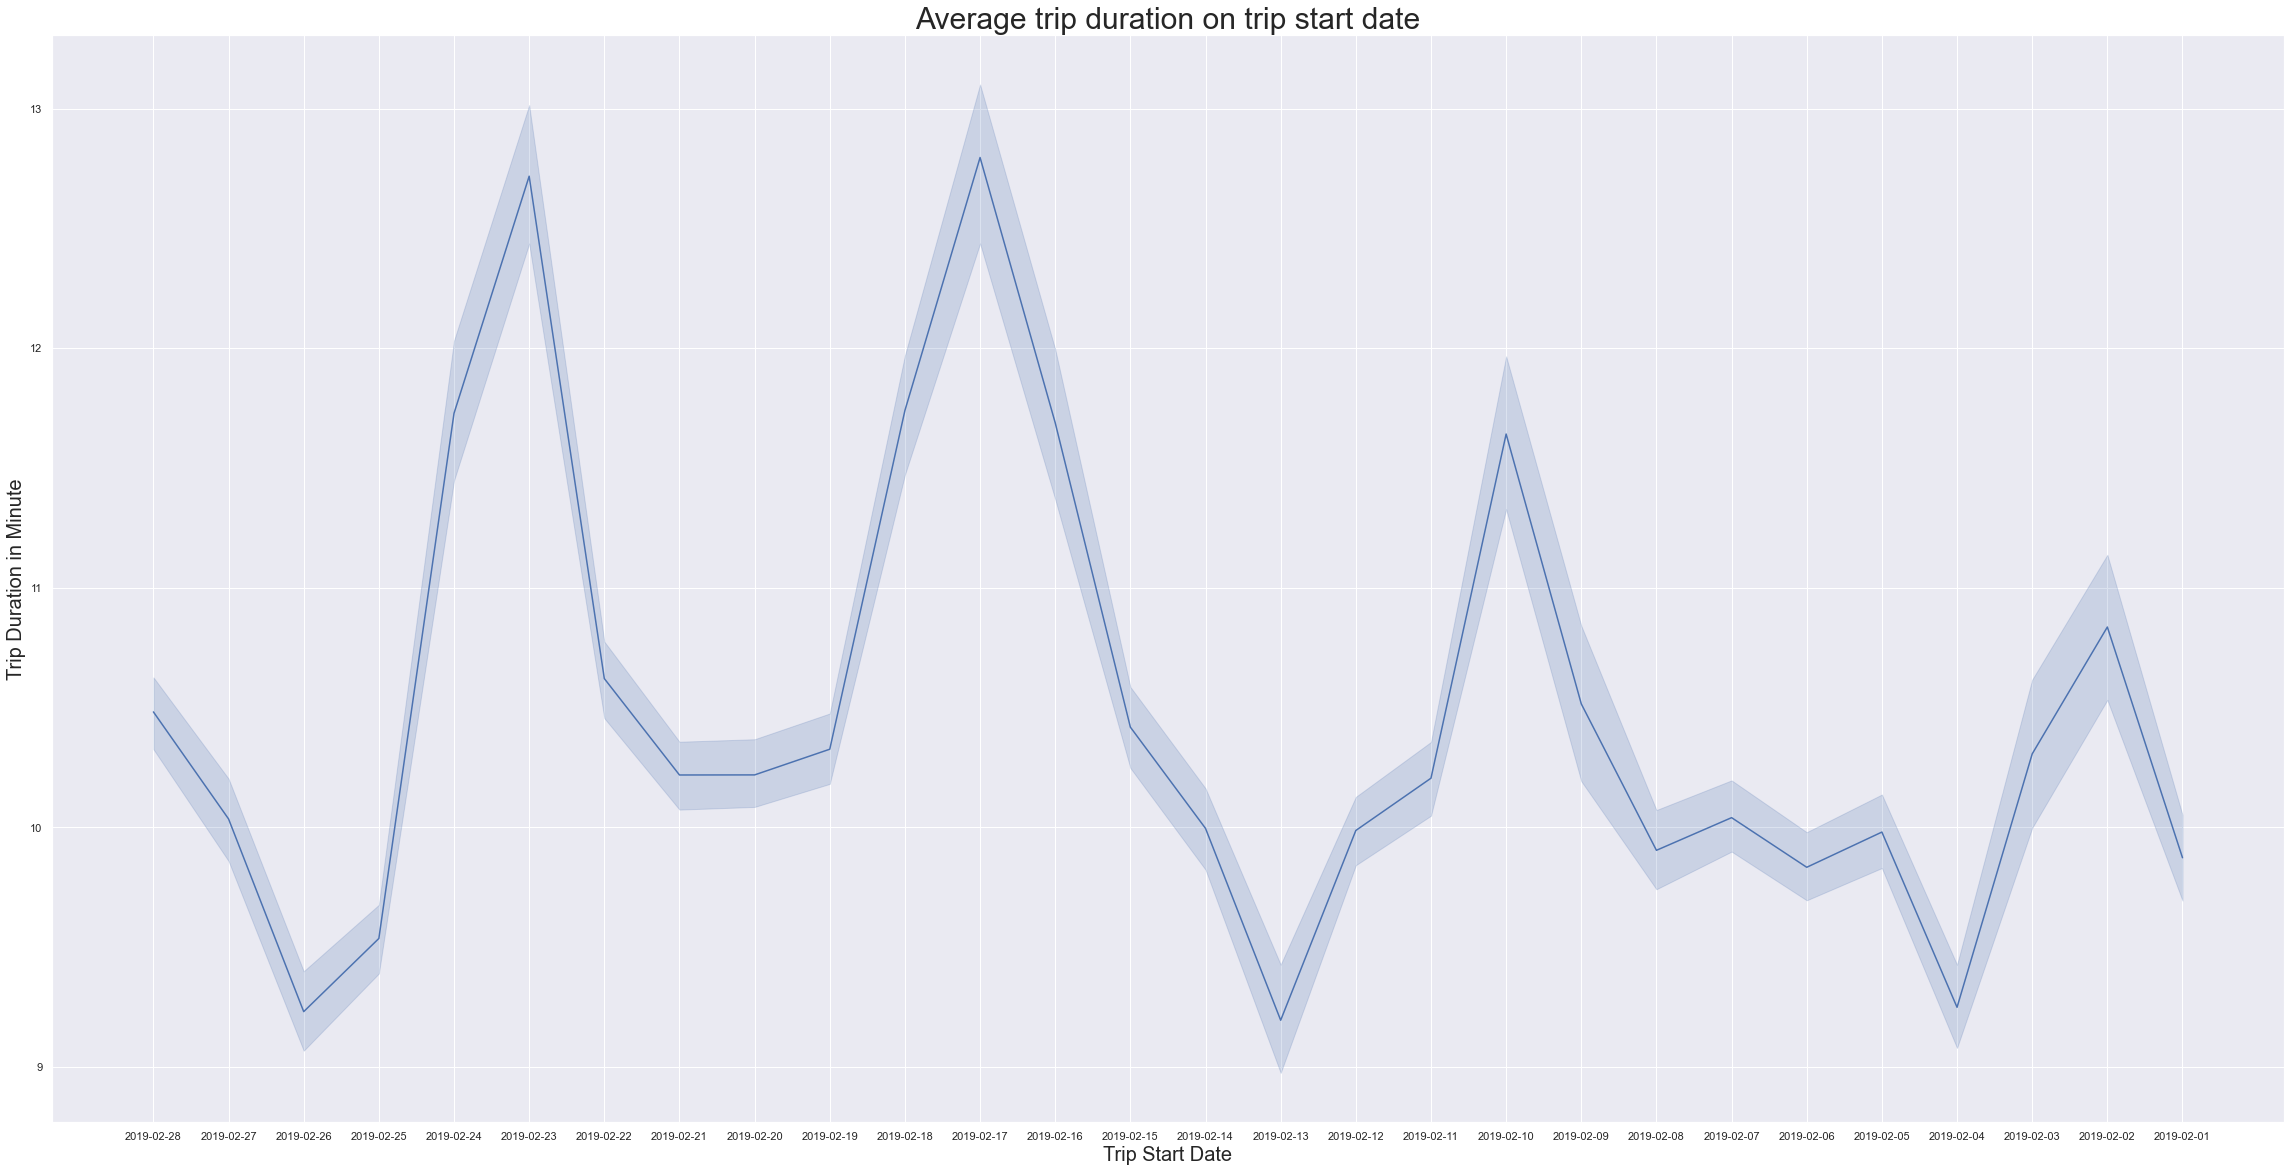

In [47]:
plt.rcParams['figure.figsize'] = 40, 20
sns.lineplot(data = data_copy, x='trip_start_date',y='duration_minutes')
plt.xlabel('Trip Start Date', fontsize = 20);
plt.ylabel('Trip Duration in Minute', fontsize = 20);
plt.title('Average trip duration on trip start date', fontsize = 30)
plt.show()

**Inferences**

The line chart shows the peak days of user average time in minutes relative to the start date of the ride

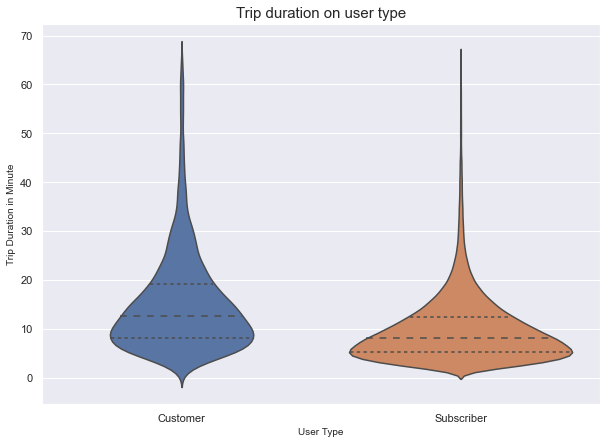

In [48]:
plt.rcParams['figure.figsize'] = 10, 7
sns.violinplot(data=data_copy, x='user_type', y='duration_minutes', inner='quartile');
plt.xlabel('User Type', fontsize = 10);
plt.ylabel('Trip Duration in Minute', fontsize = 10);
plt.title('Trip duration on user type', fontsize = 15)
plt.show()

**Inferences**

On the shorter/quicker trip end, the trip length distribution is substantially narrower for subscribers compared to non-subscribers. This further supports the inference made previously. It appears that subscribers have a more precise purpose or usage for the bicycles than customers who vary more and typically hire the bikes for longer durations.

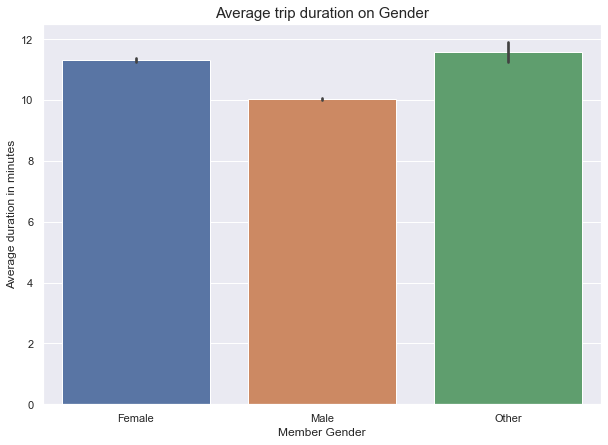

In [49]:
sns.barplot(data=data_copy, x = 'member_gender', y= 'duration_minutes')
plt.xlabel('Member Gender')
plt.ylabel('Average duration in minutes')
plt.title('Average trip duration on Gender', fontsize = 15)
plt.show()

**Inferences**

Though not a huge difference, male riders tend to have shorter trips compared to female users and other gender

In [50]:
data_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minutes,trip_start_date,trip_start_hour_of_day,trip_start_day_of_week,trip_start_month,age_of_rider
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,Yes,26.416667,2019-02-28,23,Thursday,February,48
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959,Male,No,29.883333,2019-02-28,23,Thursday,February,63
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,Subscriber,1983,Female,No,19.116667,2019-02-28,23,Thursday,February,39
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Subscriber,1989,Male,No,26.916667,2019-02-28,23,Thursday,February,33
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Subscriber,1988,Other,No,26.166667,2019-02-28,23,Thursday,February,34


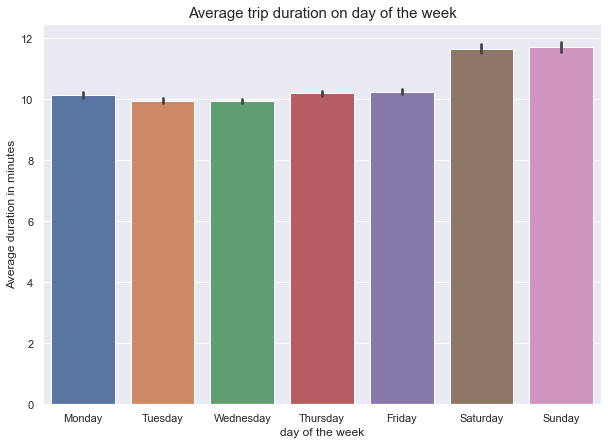

In [51]:
sns.barplot(data=data_copy, x = 'trip_start_day_of_week', y= 'duration_minutes')
plt.xlabel('day of the week')
plt.ylabel('Average duration in minutes')
plt.title('Average trip duration on day of the week', fontsize = 15)
plt.show()

**Inferences**

Monday through Friday riding trips are significantly shorter than weekend rides. It implies a fairly consistent and efficient use of the sharing system on weekdays, with a more casual and flexible usage pattern on weekends. Even though there are more rides during the week, the average duration in minutes on weekends is slightly longer than during the week.

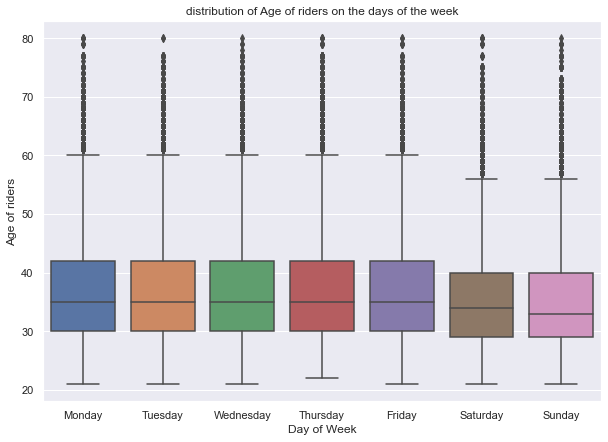

In [52]:
sns.boxplot(data=data_copy, x='trip_start_day_of_week', y='age_of_rider');
plt.xlabel('Day of Week');
plt.ylabel('Age of riders');
plt.title('distribution of Age of riders on the days of the week')
plt.show()

**Inferences**

The riders who rented the bikes Monday through Friday are slightly older than those who ride on the weekends, correlating with the commute to work utilisation found in the preceding univariable exploration plots.

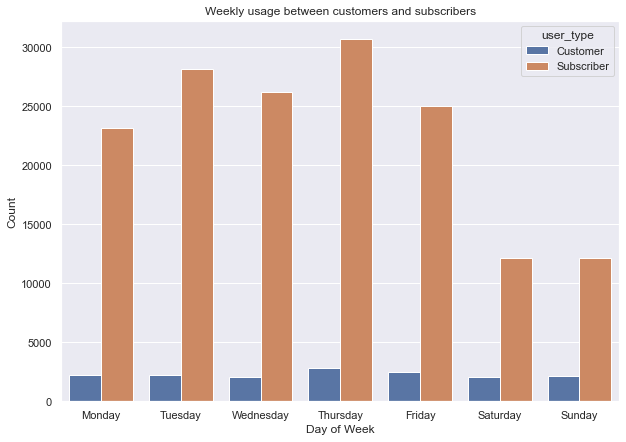

In [53]:
sns.countplot(data=data_copy, x='trip_start_day_of_week', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Count');
plt.title("Weekly usage between customers and subscribers")
plt.show()

**Inferences**

Overall, there were far more subscribers than customers. The decrease in volume on weekends for subscribers suggests that they predominantly use bikes for commuting to and from work during the week, whereas the minor increase in usage on weekends for consumers indicates that they largely use bikes for leisure/touring and relaxing purposes.

#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There are much more subscribers than customers. The riding patterns of subscribers and customers vary significantly. Subscribers use the bike sharing system to commute to work, so the majority of trips occurred on weekdays (Mon-Fri) and especially during rush hours (when going to work in the morning and leaving in the afternoon), whereas customers typically ride for recreation on weekends in the late afternoon or early evening. The drop in usage on weekends for subscribers suggests that they primarily use their bikes for commuting to and from work during the week, whereas the little increase in usage on weekends for consumers suggests that they primarily use their bikes for leisure/touring and relaxing purposes.

#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
It is intriguing to see that subscribers are, on average, slightly older than customers, but take far shorter/faster rides, and that weekday rides are significantly shorter than weekend journeys. It indicates a reasonably constant and efficient weekday use of the sharing system, with a more casual and flexible weekend usage pattern. Despite the fact that there are more rides during the week, the weekend average duration in minutes is somewhat longer.

In [54]:
data_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minutes,trip_start_date,trip_start_hour_of_day,trip_start_day_of_week,trip_start_month,age_of_rider
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,Yes,26.416667,2019-02-28,23,Thursday,February,48
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959,Male,No,29.883333,2019-02-28,23,Thursday,February,63
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,Subscriber,1983,Female,No,19.116667,2019-02-28,23,Thursday,February,39
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Subscriber,1989,Male,No,26.916667,2019-02-28,23,Thursday,February,33
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Subscriber,1988,Other,No,26.166667,2019-02-28,23,Thursday,February,34


### Multivariate Exploration

- How does the average trip duration vary in weekdays between user type (customers and subscribers)?
- How does the average trip duration vary with member gender between user type (customers and subscribers)?

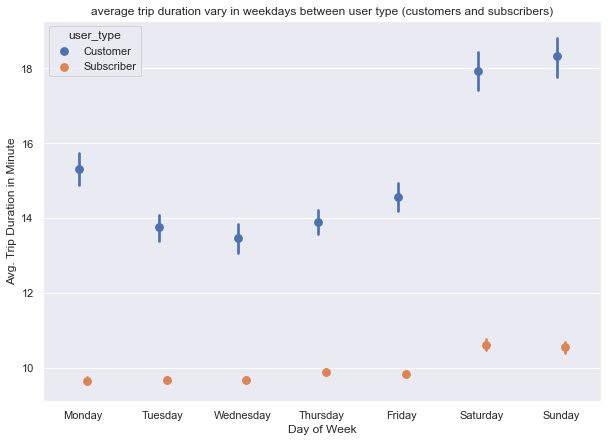

In [55]:
sns.pointplot(data=data_copy, x='trip_start_day_of_week', y='duration_minutes', hue='user_type', dodge=0.1, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');
plt.title('average trip duration vary in weekdays between user type (customers and subscribers)')
plt.show()

**Inferences**

Each day of the week, subscribers take shorter/quicker trips compared to customers, as shown in the above graph. On Saturdays and Sundays, trip duration increases significantly for both user segments, especially for casual riders. Monday through Friday, the average duration of subscribers' usage was much more stable than that of customers as a whole.

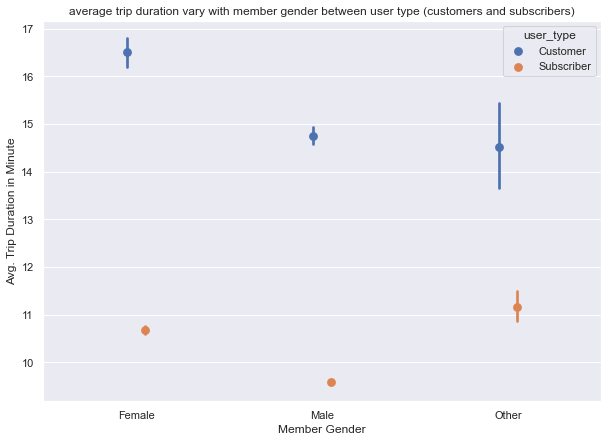

In [56]:
sns.pointplot(data=data_copy, x='member_gender', y='duration_minutes', hue='user_type', dodge=0.1, linestyles="");
plt.xlabel('Member Gender');
plt.ylabel('Avg. Trip Duration in Minute');
plt.title('average trip duration vary with member gender between user type (customers and subscribers)')
plt.show()

**Inferences**

The above graph demonstrates that female customers ride longer/more slowly than male/other gender customers, who go significantly shorter/faster. In addition, female gender subscribers ride more longer/more slowly than male/other gender subscribers, who ride lot shorter/faster on their journeys.

#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
The multivariate investigation reinforced some of the patterns observed in the previous bivariate and univariate explorations; the relationship between the various variables plotted are visualised collectively, and the information is presented in a unified manner. The efficient/short time of usage for subscribers corresponds to their high concentration during rush hours Monday through Friday, showing that the consumption is mostly for commuting to and from work. The more relaxed and flexible usage pattern of customers indicates that they are using the bike-sharing system considerably differently than subscribers, primarily on weekends and in the afternoons, likely for city tours or recreational purposes.

#### Were there any interesting or surprising interactions between features?
The interactions between characteristics are complementary and make sense when viewed as a whole, thus there is no cause for surprise. This may be because to the disproportionate number of female riders/records relative to male riders/records. If there were more female data, it would be fascinating to compare how men and women use the system differently.